In [1]:
#Notes
#ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+.THRESH_OTSU)
#blur = cv2.GaussianBlur(gray,(5,5),0)
#ret, thresh = cv2.threshold(blur, 0, 255,
#TODO: LOOK INTO WATERSHED/DO TRIALS?
#READING: article about PSO and others

In [2]:
import numpy as np
import cv2
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
#os enables reading files and directories
import os
import ipywidgets as widgets

In [3]:
def pixel_data(img):
    img_px = np.ndarray.flatten(img)
    return img_px
    

In [4]:
def histogram_display(inp_tbl):
    inp_tbl.hist(inp_tbl.labels[0])    

In [5]:
#I dont do anything with this method at the moment
def img_display(inp_img):
    plt.imshow(inp_img, 'gray')
    plt.show()

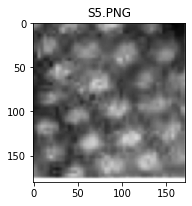

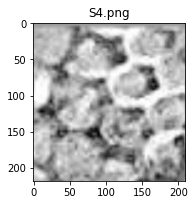

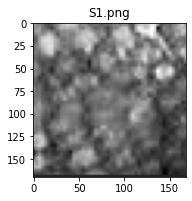

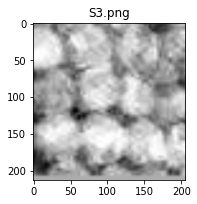

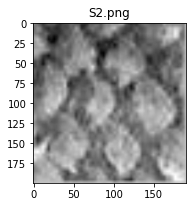

interactive(children=(Dropdown(description='inp_tbl', options=(S5.PNG
81
190
240
81
190
240
81
190
240
81
... …

In [6]:
plt.cla()

#access img directory
dirname = 'Scale_images/'

#create an iterator object for img directory
directory = os.scandir(dirname)

#path name for histogram directory: do I nee
newpath = 'hist_dir/' 

#lists of all the data for each image
hist_lst = []
img_lst = []

#if histogram directory does not exist create a new one
if not os.path.exists(newpath):
        os.makedirs(newpath)
        
#creates
img_data = 'img_data.csv'

#if file img_data does not exist create
if not os.path.exists(newpath + img_data):
    with open(os.path.join(newpath, img_data), 'w') as fp: 
        pass
    
        
#iterate through images in the img directory
for img in directory:
    img_name = img.name
    if (img_name != '.ipynb_checkpoints'):

        
        #read the image, convert to grayscale, make histogram
        img = cv2.imread(dirname + "" + img_name)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        
        plt.subplot(1, 2, 1), plt.imshow(gray, 'gray')
        plt.title(img_name)
        plt.show()
        
        #make a file for every histogram needed         
        
        tbl = Table().with_column(img_name, pixel_data(img))
        hist_lst.append(tbl)
        img_lst.append(gray)
    
_ = widgets.interact(histogram_display, inp_tbl=list(hist_lst))


#TODO: Widget for images?
#_ = widgets.interact(img_display, inp_img=list(lst2))


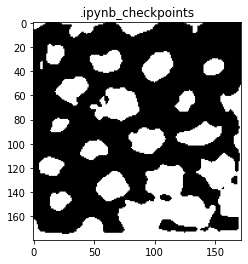

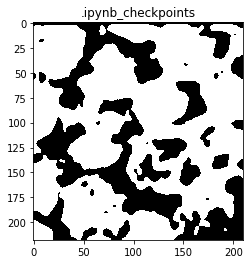

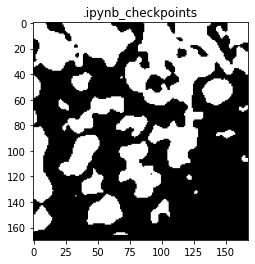

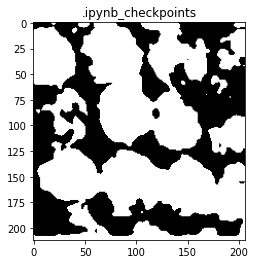

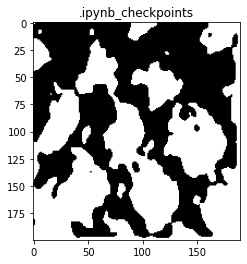

In [14]:

for img in img_lst:
    title = img_name
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret, thresh = cv2.threshold(blur,175 , 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) #adjust second parameter for different results
    plt.imshow(thresh, 'gray')
    plt.title(title)
    plt.show()


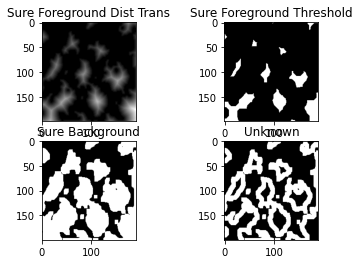

In [8]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=1)

# Finding sure foreground area: What does cv2.DIST do?
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

ret, sure_fg = cv2.threshold(dist_transform,0.3*dist_transform.max(),255,0)
#adjust second parameter for different results (original tutorial had 0.7)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.subplot(2, 2, 1), plt.imshow(dist_transform, 'gray')
plt.title('Sure Foreground Dist Trans')
plt.subplot(2, 2, 2), plt.imshow(sure_fg, 'gray')
plt.title('Sure Foreground Threshold')
plt.subplot(2, 2, 3), plt.imshow(sure_bg, 'gray')
plt.title('Sure Background')
plt.subplot(2, 2, 4), plt.imshow(unknown, 'gray')
plt.title('Unknown')
plt.show()

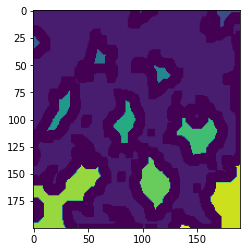

In [9]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.imshow(markers)
plt.show()

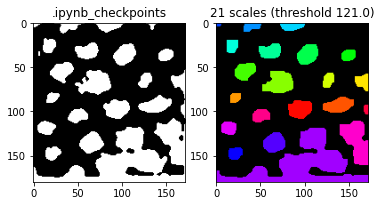

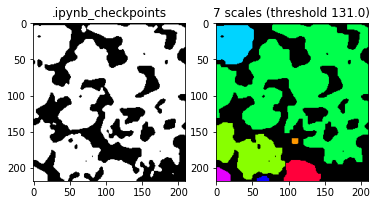

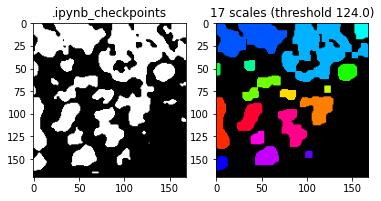

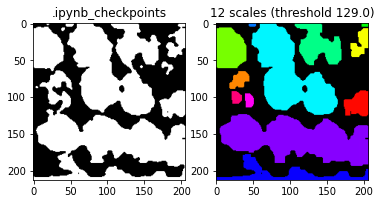

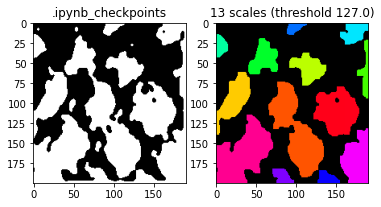

In [32]:
for img in img_lst:
        
   
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret, thresh = cv2.threshold(blur,175 , 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) #adjust second parameter for different results
    blur = cv2.GaussianBlur(thresh,(5,5),0)
    ret, thresh = cv2.threshold(blur,175 , 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) #adjust second parameter for different results

    # Threshold using value calculated by Otsu's Binarization
    # source: https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

    # Remove noise
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations=3)

    # Label and count
    # source: https://medium.com/analytics-vidhya/images-processing-segmentation-and-objects-counting-in-an-image-with-python-and-opencv-216cd38aca8e
    count, labels = cv2.connectedComponents(opening)
    count = count - 1 # background doesn't count as a scale
    label_hue = np.uint8(179 * labels / np.max(labels))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    labeled_img[label_hue == 0] = 0
    
    plt.subplot(1, 2, 1), plt.imshow(thresh, 'gray')
    plt.title(img_name)
    plt.subplot(1, 2, 2), plt.imshow(labeled_img, 'gray')
    # Title shows threshold value calculated using Otsu's
    plt.title(str(count) + ' scales (threshold ' + str(ret) + ')')
    plt.show()
    
    


AttributeError: 'numpy.ndarray' object has no attribute 'plot'